AI - 1 : Design & analyze the application of Artificial Intelligence for Graph Theory
concept

In [5]:
class City:
    def __init__(self, name):
        self.name = name
        self.connections = {}  # to store neighboring cities and distances
    
    def add_connection(self, city, distance):
        self.connections[city] = distance

class StateSpaceGraph:
    def __init__(self):
        self.cities = {}
    
    def add_city(self, city_name):
        city = City(city_name)
        self.cities[city_name] = city
    
    def add_connection(self, city1, city2, distance):
        self.cities[city1].add_connection(self.cities[city2], distance)
        self.cities[city2].add_connection(self.cities[city1], distance)
    
    def shortest_path(self, start_city, end_city):
        distances = {city: float('inf') for city in self.cities}
        distances[start_city] = 0
        visited_cities = set()
        unvisited_cities = set(self.cities.values())
        
        while unvisited_cities:
            current_city = min(unvisited_cities, key=lambda city: distances[city.name])
            unvisited_cities.remove(current_city)
            visited_cities.add(current_city)
            
            for neighbor, distance in current_city.connections.items():
                if neighbor in visited_cities:
                    continue
                new_distance = distances[current_city.name] + distance
                if new_distance < distances[neighbor.name]:
                    distances[neighbor.name] = new_distance
        return distances[end_city]


In [6]:
graph = StateSpaceGraph()
graph.add_city('A')
graph.add_city('B')
graph.add_city('C')
graph.add_city('D')
graph.add_connection('A', 'B', 2)
graph.add_connection('B', 'C', 3)
graph.add_connection('C', 'D', 1)
graph.add_connection('A', 'D', 5)

In [8]:
firstCity = input((f"Enter the starting city: "))
secondCity = input((f"Enter the destination city: "))
print(f"The shortest distance between the cities {firstCity} and {secondCity} is {graph.shortest_path(firstCity, secondCity)}.")

The shortest distance between the cities B and D is 4.


AI - 2 : For a given set of training data examples stored in a .CSV file, implement and
demonstrate the Candidate-Elimination algorithm to output a description of the set
of all hypotheses consistent.

In [9]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Fuzail\Downloads\CEDS12.csv",header=0)
dataset = df.values.tolist()
df

,Example,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,1,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,2,Sunny,Warm,High,Strong,Warm,Same,Yes
2,3,Rain,Cold,High,Strong,Warm,Change,No
3,4,Sunny,Warm,High,Strong,Cool,Change,Yes


In [10]:
s=dataset[0][0:-1]
print("The initial value of s is :\n",s)

#initialize the general hypothesis
g=[['?' for i in range(len(s))] for j in range(len(s))]
print("The initial value of g is :\n",g)

for row in dataset:
    if row[-1]=="Yes":
        for j in range(len(s)):
            if row[j]!=s[j]:
                s[j]='?'
                g[j][j]='?'
    elif row[-1]=="No":
        for j in range(len(s)):
            if row[j]!=s[j]:
                g[j][j]=s[j]
            else:
                g[j][j]="?"
    print("\nAfter",dataset.index(row)+1,"th insatnce")
        
    print("Specific boundary is :",s)
    print("General boundary is :",g)

print("\nFinal specific hypothesis:\n",s)
print("\nFinal general hypothesis:\n",g)

The initial value of s is :
 [1, 'Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
The initial value of g is :
 [['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?']]

After 1 th insatnce
Specific boundary is : [1, 'Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
General boundary is : [['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?']]

After 2 th insatnce
Specific boundary is : ['?', 'Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
General boundary is : [['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?'], ['?', '?',

AI - 3 : Write a python program to remove punctuations from the given string

In [3]:
import string
paragraph = input("Enter a paragraph: ")
print(paragraph)
count = 0
paragraph = paragraph.translate(str.maketrans("", "", string.punctuation))
num_spaces = paragraph.count(" ")
for i in range(0, len(paragraph)):  
    if(paragraph[i] != ' '):  
        count = count + 1; 
print(f"Paragraph without punctuation: {paragraph}")
print(f"Number of spaces: {num_spaces}")
print(f"Total number of characters: " + str(count))

Hello, how are you? it is a, sunday. tomorrow is a, monday
Paragraph without punctuation: Hello how are you it is a sunday tomorrow is a monday
Number of spaces: 11
Total number of characters: 42


In [4]:
cr = input("Enter character to be replaced : ")
cre = input("Enter replacement character : ")
for c in paragraph:
    if c == cr:
        paragraph = paragraph.replace(c,cre)
        
print("String after character filter : "+paragraph)

String after character filter : Hello how are you it is a sunday tomorrow is a monday


AI - 4 : Implement naïve bayes theorem to classify the English text

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [24]:
X_train = ['I love playing sports', 'Politics is my passion', 'Sports are fun', 'Politics is boring']
y_train = ['sports', 'politics', 'sports', 'politics']
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)

In [25]:
model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

In [28]:
X_test = ['I enjoy watching sports on TV', 'Politics is important for our country', 'i love politics']
X_test_counts = vectorizer.transform(X_test)
y_pred = model.predict(X_test_counts)

In [29]:
output = []
for index, i in enumerate(range(len(X_test))):
    output.append([X_test[i], y_pred[i]])
    print(output[index])

['I enjoy watching sports on TV', 'sports']
['Politics is important for our country', 'politics']
['i love politics', 'politics']


AI - 5 : Implement the finite words classification system using back propagation
algorithm

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [25]:
df = pd.read_csv('C:/Users/Fuzail/Desktop/6th Sem/AI/Lab/AI-2 5 Finite words/statements.csv', names=['Message', 'Label'])
print("The Total instances in the Dataset: ", df.shape[0])
df['labelnum'] = df.Label.map({'pos': 1, 'neg': 0})

The Total instances in the Dataset:  18


In [26]:
# place the data in X and Y Vectors
X = df["Message"]
Y = df.labelnum

In [27]:
# to split the data into train se and test set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)
vect = CountVectorizer()
Xtrain_dims = vect.fit_transform(Xtrain)
Xtest_dims = vect.transform(Xtest)
df = pd.DataFrame(Xtrain_dims.toarray(),columns=vect.get_feature_names_out())
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [28]:
#to fit the train data into model
clf.fit(Xtrain_dims, Ytrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [29]:
# to predict the test data
prediction = clf.predict(Xtest_dims)
print('******** Accuracy Metrics *********')
print('Accuracy : ', accuracy_score(Ytest, prediction)) 
print('Recall : ', recall_score(Ytest, prediction)) 
print('Precision : ',precision_score(Ytest, prediction))
print('Confusion Matrix : \n', confusion_matrix(Ytest, prediction))

******** Accuracy Metrics *********
Accuracy :  0.4
Recall :  0.6666666666666666
Precision :  0.5
Confusion Matrix : 
 [[0 2]
 [1 2]]


In [31]:
# to predict the input statement
test_stmt = [input("Enter any statement to predict :")]
test_dims = vect.transform(test_stmt)
pred = clf.predict(test_dims)
for stmt,lbl in zip(test_stmt,pred):    
    if lbl == 1:
        print("Statement is Positive")
    else:
        print("Statement is Negative")

Statement is Negative


AI - 6 : “NLP - Sentiment Analysis - Restaurant Reviews”

In [15]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
df = pd.read_csv (r'C:\Users\Fuzail\Downloads\Restaurant_Reviews.tsv', delimiter='\t' )
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [19]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fitting Naive Bayes to the Training set
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[119  33]
 [ 34 114]]


Accuracy is  77.67 %
Precision is  0.78
Recall is  0.77


In [20]:
def predict_sentiment(sample_review): 
 sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review) 
 sample_review = sample_review.lower() 
 sample_review_words = sample_review.split() 
 sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))] 
 ps = PorterStemmer() 
 final_review = [ps.stem(word) for word in sample_review_words] 
 final_review = ' '.join(final_review) 
 temp = cv.transform([final_review]).toarray() 
 return classifier.predict(temp) 

In [21]:
s=input()
if predict_sentiment(s): 
    print('This is a POSITIVE review.') 
else: 
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


AI - 7 : Write a Python program to implement Named Entity recognition

In [47]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fuzail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Fuzail\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Fuzail\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Fuzail\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [48]:
paragraph = """Scarface is a 1983 American crime drama film directed by Brian
De Palma and written by Oliver Stone. \
 Loosely based on the 1929 novel of the same name and serving as a loose
remake of the 1932 film,\
 it tells the story of Cuban refugee Tony Montana (Al Pacino), \
 who arrives penniless in Miami during the Mariel boatlift and becomes a
powerful and extremely homicidal drug lord.\
 The film co-stars Steven Bauer, Michelle Pfeiffer, Mary Elizabeth Mastrantonio
and Robert Loggia.\
 De Palma dedicated this version of Scarface to the memories of Howard Hawks
and Ben Hecht, \
 the writers of the original film."""

In [49]:
for sentence in nltk.sent_tokenize(paragraph):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence))):
        if hasattr(chunk, 'label'):
            print(f"{' '.join(c[0] for c in chunk):<35} {chunk.label()}")

Scarface                            GPE
American                            GPE
Brian De Palma                      PERSON
Oliver Stone                        PERSON
Cuban                               GPE
Tony Montana                        PERSON
Al Pacino                           PERSON
Miami                               GPE
Mariel                              ORGANIZATION
Steven Bauer                        PERSON
Michelle Pfeiffer                   PERSON
Mary Elizabeth Mastrantonio         PERSON
Robert Loggia                       PERSON
De                                  PERSON
Palma                               PERSON
Scarface                            GPE
Howard Hawks                        PERSON
Ben Hecht                           PERSON


AI - 8 : Write a Python program to recognize handwritten numbers from the
MNIST dataset using Tensorflow

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
tem = random.randint(1, 1000)
images = X_train[tem]
labels = y_train[tem]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [54]:
model = Sequential([
 Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D(pool_size=(2, 2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dropout(0.5),
 Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1,
validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(X_test)

Epoch 1/5
469/469 [==============================] - 23s 47ms/step - loss: 0.3151 - accuracy: 0.9076 - val_loss: 0.0867 - val_accuracy: 0.9739
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.1144 - accuracy: 0.9667 - val_loss: 0.0540 - val_accuracy: 0.9817
Epoch 3/5
469/469 [==============================] - 20s 43ms/step - loss: 0.0853 - accuracy: 0.9742 - val_loss: 0.0503 - val_accuracy: 0.9834
Epoch 4/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0415 - val_accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0414 - val_accuracy: 0.9855
Test loss: 0.04141122102737427
Test accuracy: 0.9854999780654907
313/313 [==============================] - 1s 4ms/step


1/1 [==============================] - 0s 54ms/step


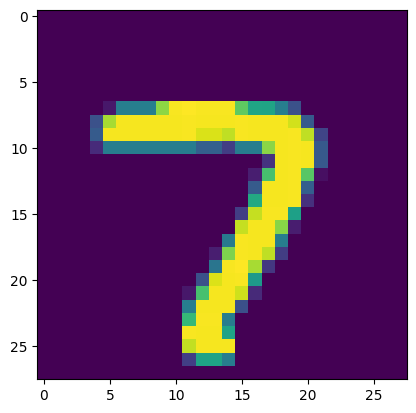

 The model has predicted that the image is of the number 7.


In [55]:
x = model.predict(images.reshape(1, 28, 28, 1))
plt.imshow(images)
plt.show()
np.argmax(x, axis=1)
number = np.where(x==1.)[1]
number = str(number).lstrip('[').rstrip(']')
print(f' The model has predicted that the image is of the number {number}.')

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2594 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1174 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0816 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0473 - accuracy: 0.9856
313/313 - 0s - loss: 0.0727 - accuracy: 0.9763 - 440ms/epoch - 1ms/step
1/1 [==============================] - 0s 65ms/step


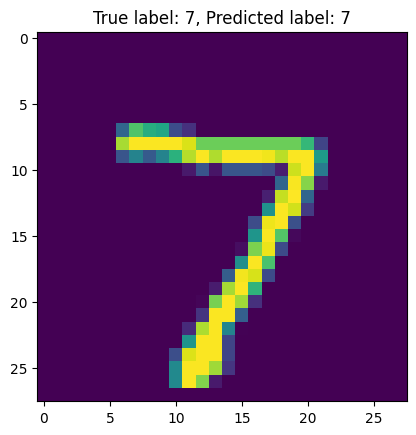

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
model.evaluate(x_test, y_test, verbose=2)

# Display a sample image and its predicted label
sample_image = x_test[0]
sample_label = y_test[0]

prediction = model.predict(tf.expand_dims(sample_image, 0))
predicted_label = tf.argmax(prediction[0]).numpy()

plt.imshow(sample_image)
plt.title(f"True label: {sample_label}, Predicted label: {predicted_label}")
plt.show()